# Vector data
This lesson will cover Vector data, giving some theoretical background, introduce
Vector storage formats and finally explore Python libraries for Vector data access and manipulation.

## Background reading

* https://docs.qgis.org/3.28/en/docs/gentle_gis_introduction/vector_data.html (Recommended!)

## What is vector data?
Vector data is spatial data, generally consisting of two parts:

* Geometry
* Attributes

**Geometries** are the *Points, Lines and Polygons* as introduced in the [Geometries Lesson](02-geometry.ipynb).
They represent the "shape" of the real-world phenomenon.
**Attribute** data is information appended to the Geometry (or the other way around)
usually in tabular format ("records"). Together, this combination Geometry+Attributes
is often called a (Spatial) **Feature**.

![Vector Data in QGIS](images/qgis-attr-table.png)

A [Triangulated Irregular network (TIN)](https://en.wikipedia.org/wiki/Triangulated_irregular_network)
is also an example of Vector data.

## Vector data formats
There are currently [over 100 vector data formats](https://gdal.org/drivers/vector/index.html) used for storage, e.g. files, and for data transfer.
The most common formats are presented below.

> Tip: [ogr2ogr](https://gdal.org/programs/ogr2ogr.html) is a GDAL/OGR commandline utility
> that allows you to convert between most vector formats.  

### ESRI Shapefile

[ESRI Shapefile](https://en.wikipedia.org/wiki/Shapefile) is a file-based format. It consists of at least 3 files:

* `.shp` containing geometry
* `.shx` containing index
* `.dbf` attribute table

The ESRI Shapefile is one of the oldest formats, some even call it a [Curse in Geoinformatics](https://www.slideshare.net/jachym/switch-from-shapefile), and is more and more replaced by GeoPackage.

### GeoPackage

[GeoPackage](https://www.geopackage.org/) is a relatively new but promising spatial data format based on the [SQLite](https://www.sqlite.org) file-database.

The [OGC GeoPackage Encoding Standard](https://www.opengeospatial.org/standards/geopackage) describes a set of conventions for storing the following
within an SQLite database:
  
* vector features
* tile matrix sets of imagery and raster maps at various scales
* attributes (non-spatial data)
* extensions
  
Thus GeoPackage can store vector as well as raster data. GeoPackage is by some called "The Shapefile Killer".
We recommend using GeoPackage over ESRI Shapefile.

### GeoJSON

[GeoJSON](https://geojson.org) is a simple JSON-based format to encode vector Features.
It is increasingly popular, especially among web developers. It is also the default data-format within
the new [OGC REST APIs](https://ogcapi.ogc.org/) like [OGC API Features](https://ogcapi.ogc.org/features/).

Example:

```
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands"
    "population": 4785
  }
}
```

GitHub is able to display [GeoJSON-encoded data on-the-fly](https://github.com/jachym/jrdata/blob/master/jsons/stops.geojson).
Note that coordinates are always in "easting, northing", thus longitude, latitude here.
The use of alternative coordinate reference systems was
removed from an earlier version of the [GeoJSON specification](https://datatracker.ietf.org/doc/html/rfc7946).
However: "*...where all involved parties have a prior arrangement, alternative coordinate reference systems can be used without risk of data being misinterpreted.*"
OGC is currently drafting [JSON-FG](https://docs.ogc.org/DRAFTS/21-045.html), GeoJSON extensions like Coordinate Reference Systems (CRS) support.

### Geography Markup Language (GML)

> The Geography Markup Language (GML) is the XML grammar defined by the Open Geospatial Consortium (OGC)
> to express geographical features. GML serves as a modeling language for geographic
> systems as well as an open interchange format for geographic transactions on the Internet. Source: [Wikipedia](https://en.wikipedia.org/wiki/Geography_Markup_Language).

Below an example of the same feature we saw earlier as GeoJSON, now in GML:

```
<gml:featureMember>
  <feature fid="12">
	<id>23</id>
	<name>Dinagat Islands</name>
	<population>4785</population>
	<ogr:geometry>
	  <gml:Point gml:id="p21" srsName="http://www.opengis.net/def/crs/EPSG/0/4326">
        <gml:pos srsDimension="2">125.6, 10.1</gml:pos>
      </gml:Point>
	</ogr:geometry>
  </feature>
</gml:featureMember>
```

GML is defined as a joint ISO-OGC Standard:

> ISO 19136 Geographic information – Geography Markup Language, is a standard from the family
> ISO/TC 211 standards for geographic information (ISO 191xx). It resulted from unification
> of the Open Geospatial Consortium definitions and Geography Markup Language (GML) with
> the ISO-191xx standards. Source: [Wikipedia](https://en.wikipedia.org/wiki/Geography_Markup_Language)

*GML Application Schemas* adds a convention to the GML standard to define domain- or community- specific application
models. Examples are [CityGML](https://en.wikipedia.org/wiki/CityGML) and schemas developed within [INSPIRE](https://inspire.ec.europa.eu/applicationschema).

GML sees quite widespread use, but due to its complexity (e.g. multiple encodings for coordinates and projections) and verbosity, is more and more
replaced by GeoJSON.

### CSV

Of course, you  can save your data in a comma separated values text file.

### PostgreSQL/PostGIS database

[PostGIS](https://postgis.net) adds support for geographic objects to the PostgreSQL object-relational database.
In effect, PostGIS "spatially enables" the PostgreSQL server, allowing it to be
used as a backend spatial database for geographic information systems (GIS),
much like ESRI's SDE or Oracle's Spatial extension.
PostGIS follows the OGC [Simple Features Specification for SQL](https://www.opengeospatial.org/standards/sfs)
and has been certified as compliant with the "Types and Functions" profile.

Like said, there are [many more vector formats](https://gdal.org/drivers/vector/index.html).

## Vector libraries
Within Python there is an ample choice of libraries to interact with vector data. The
most popular are:

* [Python bindings](https://gdal.org/python/) for [GDAL OGR](https://gdal.org/), a.k.a. "OGR"
* [Fiona](https://toblerity.org/fiona/manual.html)
* [GeoPandas](https://geopandas.org/)

This chapter will first focus on Fiona and OGR, ending with GeoPandas.
[Fiona](https://toblerity.org/fiona/) is maintained by [Sean Gillies](https://github.com/sgillies) and adds a utility/wrapper layer on top of OGR in a Pythonic fashion.
Compared to Fiona, OGR (Python bindings) provides more finegrained control over data, for example reprojections,
and supports all GDAL/OGR vector formats.

## Manipulating features with Fiona and Shapely
Fiona and Shapely are often used together.
Here we use Fiona
to read Vector data (Features) into memory for subsequent manipulation with Shapely.

Feature geometry can be accessed using the `geometry` property of each feature. For example
we can open the dataset that contains a (Multi)Polygon for each country and print
out the geometry of a random Feature (country):

First we import `Shapely` and its functions and then convert the JSON-encoded geometries to Geometry objects
using the `shape` function.

In [1]:
import fiona
from shapely.geometry import shape

Next we open a GeoPackage `countries` file and loop through the Features.
You may observe the Pythonism that Fiona supplies (using `with` and `as`) to
open and loop through Features in a single step.

  > NB the countries-file has its geometries in SRS/CRS EPSG:3857, also known as the
  > [Web Mercator Projection](https://en.wikipedia.org/wiki/Web_Mercator_projection). That projection is
  > in meters, hence values like `area` are in meters as well.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is Canada


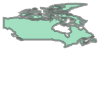

In [5]:
with fiona.open("/content/drive/MyDrive/Colab Notebooks/geopython-workshop/workshop/jupyter/content/data/countries.gpkg") as countries:
	country = countries[4]
	print(f'This is {country["properties"]["NAME"]}')
	geom = shape(country["geometry"])

geom # Jupyter can display geometry data directly

In [6]:
print(geom.geom_type)

MultiPolygon


In [7]:
print(geom.area)

1712.9952276493766


In [8]:
# In km
print(geom.length / 1000)

0.9160628551387681


Let's have a look at some geometry methods.
Tip: Shapely code is well-documented, you can always use the Python built-in `help()` function.

In [9]:
help(geom)

Help on MultiPolygon in module shapely.geometry.multipolygon object:

class MultiPolygon(shapely.geometry.base.BaseMultipartGeometry)
 |  MultiPolygon(polygons=None)
 |  
 |  A collection of one or more Polygons.
 |  
 |  If component polygons overlap the collection is invalid and some
 |  operations on it may fail.
 |  
 |  Parameters
 |  ----------
 |  polygons : sequence
 |      A sequence of Polygons, or a sequence of (shell, holes) tuples
 |      where shell is the sequence representation of a linear ring
 |      (see LinearRing) and holes is a sequence of such linear rings.
 |  
 |  Attributes
 |  ----------
 |  geoms : sequence
 |      A sequence of `Polygon` instances
 |  
 |  Examples
 |  --------
 |  Construct a MultiPolygon from a sequence of coordinate tuples
 |  
 |  >>> from shapely import Polygon
 |  >>> ob = MultiPolygon([
 |  ...     (
 |  ...     ((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)),
 |  ...     [((0.1,0.1), (0.1,0.2), (0.2,0.2), (0.2,0.1))]
 |  ...     )


For example we can make a buffer of 500 meter around our polygon (making Canada somewhat bigger):

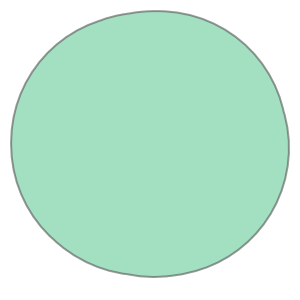

In [10]:
buffered_geom = geom.buffer(500)
buffered_geom

In [11]:
# In km
buffered_geom.length / 1000

3.3610486699206814

We can also create geometries from scratch using various functions in `shapely` as follows

In [12]:
from shapely.geometry import Polygon,Point,LineString
pt = Point(10,10)
line = LineString([(0,0),(0,3),(3,0)])
poly = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

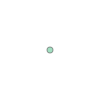

In [13]:
pt

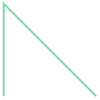

In [14]:
line

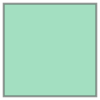

In [15]:
poly

#### Geospatial analysis using shapely

In [16]:
poly.touches(line)

True

In [17]:
poly.contains(pt)

False

In [18]:
pt.buffer(20).contains(poly)

True

### Converting the geometry back to JSON format
Once we are finished, we can convert the geometry back to JSON format using `shapely.geometry.mapping` function


In [19]:
from shapely.geometry import mapping

In [20]:
# let's create new GeoJSON-encoded vector feature

new_feature = {
    'type': 'Feature',
    'properties': {
        'name': 'My buffered feature'
    },
    'geometry': mapping(buffered_geom)
}
new_feature

# Now we could e.g. write the Feature back to file

{'type': 'Feature',
 'properties': {'name': 'My buffered feature'},
 'geometry': {'type': 'Polygon',
  'coordinates': (((72.84455234092736, -436.8909257382219),
    (28.369113932941858, -447.59028297422674),
    (-18.64090152930764, -454.26692981786),
    (-23.548912093358698, -454.493266974023),
    (-31.620815868753063, -455.735674785674),
    (-82.4392777167916, -458.3248949111327),
    (-82.69008928092023, -458.3248949111327),
    (-136.905886936172, -455.3768512342165),
    (-189.5182575398419, -446.72600799003936),
    (-204.59188370112247, -445.0934644069607),
    (-257.29347899084337, -433.5381542880683),
    (-258.9356009797822, -433.0839959628712),
    (-302.4230362141973, -418.8854463254376),
    (-344.43074219860443, -400.7716815869377),
    (-346.83506572563226, -399.6017271598496),
    (-355.2980971488792, -394.9446441491084),
    (-355.83455247383563, -394.7056714436122),
    (-361.16347628770336, -391.7170113810271),
    (-390.78728213744887, -375.4154622035794),
    (-

## GDAL/OGR Python Bindings


[OGR](https://gdal.org/faq.html#what-is-this-ogr-stuff) is part of the [GDAL](https://gdal.org/) library for the support of Vector data.
OGR supports about [100+ vector formats](https://gdal.org/drivers/vector/index.html) and
has more/other functionalities (than Fiona) like reprojection.

The OGR API wraps differences between various vector formats, web-services, database etc..
The following terminology applies to OGR:

* **Driver** - driver for reading and writing for a specified format
* **Data Source** - the named data source (file, database, web-service, ...)
* **Layer** - data layer within the Data Source (file content, database table, ...)
* **Feature** - vector feature
* **Field, Geometry** - attributes and geometry

The OGR-Python interface is an abstract API on top of the
original classes and methods of the original C++ code.
Because of this, some approaches may seem complicated,
compared to native Python code, like e.g. Fiona.

### Links

* GDAL OGR Vector API tutorial: https://gdal.org/tutorials/vector_api_tut.html
* Python API: https://gdal.org/python/
* GDAL/OGR Python Cookbook https://pcjericks.github.io/py-gdalogr-cookbook/ - Recommended!

### Buffer
First we need to open the *Data Source*, printing the number of Layers.

In [3]:
from osgeo import ogr
ds = ogr.Open('/content/drive/MyDrive/Colab Notebooks/geopython-workshop/workshop/jupyter/content/data/countries.gpkg')
print(ds)
print(ds.GetLayerCount())

<osgeo.ogr.DataSource; proxy of <Swig Object of type 'OGRDataSourceShadow *' at 0x79f66fa55ef0> >
1


Next we have to fetch and open the *Layer*. NB for files, there is usually just one layer, index `0`,
within the Data Source (DS), but for example for a database DS, a Layer is refers to a concrete table).

In [4]:
l = ds.GetLayer(0)
print(l)
print(l.GetFeatureCount())

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x79f66c974ed0> >
176


Show the schema of the layer and the definition of its geometry type:

In [5]:
l.GetGeomType()

6

In [6]:
l.GetGeomType() == ogr.wkbMultiPolygon

True

In [7]:
for s in l.schema:
    print(s.GetName())

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
GDP_MD_EST
POP_YEAR
LASTCENSUS
GDP_YEAR
ECONOMY
INCOME_GRP
WIKIPEDIA
FIPS_10_
ISO_A2
ISO_A3
ISO_A3_EH
ISO_N3
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_A3_IS
ADM0_A3_US
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
NE_ID
WIKIDATAID
NAME_AR
NAME_BN
NAME_DE
NAME_EN
NAME_ES
NAME_FR
NAME_EL
NAME_HI
NAME_HU
NAME_ID
NAME_IT
NAME_JA
NAME_KO
NAME_NL
NAME_PL
NAME_PT
NAME_RU
NAME_SV
NAME_TR
NAME_VI
NAME_ZH


In [8]:
l.schema[4].name

'SOV_A3'

Print name attribute of all features

In [9]:
features_nr = l.GetFeatureCount()
for i in range(features_nr):
    f = l.GetNextFeature()
    print(f.GetField('NAME'))

Fiji
Tanzania
W. Sahara
Canada
United States of America
Kazakhstan
Uzbekistan
Papua New Guinea
Indonesia
Argentina
Chile
Dem. Rep. Congo
Somalia
Kenya
Sudan
Chad
Haiti
Dominican Rep.
Russia
Bahamas
Falkland Is.
Norway
Greenland
Fr. S. Antarctic Lands
Timor-Leste
South Africa
Lesotho
Mexico
Uruguay
Brazil
Bolivia
Peru
Colombia
Panama
Costa Rica
Nicaragua
Honduras
El Salvador
Guatemala
Belize
Venezuela
Guyana
Suriname
France
Ecuador
Puerto Rico
Jamaica
Cuba
Zimbabwe
Botswana
Namibia
Senegal
Mali
Mauritania
Benin
Niger
Nigeria
Cameroon
Togo
Ghana
Côte d'Ivoire
Guinea
Guinea-Bissau
Liberia
Sierra Leone
Burkina Faso
Central African Rep.
Congo
Gabon
Eq. Guinea
Zambia
Malawi
Mozambique
eSwatini
Angola
Burundi
Israel
Lebanon
Madagascar
Palestine
Gambia
Tunisia
Algeria
Jordan
United Arab Emirates
Qatar
Kuwait
Iraq
Oman
Vanuatu
Cambodia
Thailand
Laos
Myanmar
Vietnam
North Korea
South Korea
Mongolia
India
Bangladesh
Bhutan
Nepal
Pakistan
Afghanistan
Tajikistan
Kyrgyzstan
Turkmenistan
Iran
Syria
A

Get vector feature bounding box (envelope):

In [10]:
f = l.GetFeature(4)
geom = f.GetGeometryRef()
geom.GetEnvelope()

(-140.99778, -52.64809872090421, 41.675105088867326, 83.23324)

Get geometry centroid

In [11]:
c = geom.Centroid()
c.GetPoint()

(-98.14238137209698, 61.46907614534888, 0.0)

Get geometry buffer

In [12]:
buff = c.Buffer(100)
geom.Intersects(buff)

True

### Complete example

In this example we will demonstrate working with vector data from begin to
end: open a data set, metadata, attribute change, saving of new attribute
back to the file.

In [13]:
from osgeo import osr

# Creating new file with new driver
drv = ogr.GetDriverByName('GML')
ds = drv.CreateDataSource('/content/drive/MyDrive/Colab Notebooks/geopython-workshop/workshop/jupyter/content/data/04-ogr-out.gml')
srs = osr.SpatialReference()
srs.ImportFromEPSG(3857)
print(srs.ExportToProj4())
layer = ds.CreateLayer('outgml', srs, ogr.wkbLineString)

# create new attributes named and code
field_name = ogr.FieldDefn('name', ogr.OFTString)
field_name.SetWidth(24)
field_number = ogr.FieldDefn('code', ogr.OFTInteger)
layer.CreateField(field_name)
layer.CreateField(field_number)

# create new line geometry and read from WKT
line = ogr.CreateGeometryFromWkt('LINESTRING(%f %f, %f %f)' % (0, 0, 1, 1))

# create new feature, set attributes and geometry
feature = ogr.Feature(layer.GetLayerDefn())
feature.SetGeometry(line)
feature.SetField('name', 'the line')
feature.SetField('code', 42)

layer.CreateFeature(feature)

# final cleaning
feature.Destroy()
ds.Destroy()

+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs


now we can check the result

In [14]:
ds = ogr.Open('/content/drive/MyDrive/Colab Notebooks/geopython-workshop/workshop/jupyter/content/data/04-ogr-out.gml')
layer = ds.GetLayer(0)
print(layer.GetFeatureCount())
print(layer.GetFeature(0).GetField('name'))
print(layer.GetFeature(0).GetField('code'))
ds.Destroy()

1
the line
42


## Fiona or GDAL/OGR?
With Fiona, the above example would be much simpler and Pythonic.
However, OGR accesses the data on a much lower/efficient level compared to Fiona,
therefore bigger datasets can be more easily handled. Also OGR supports more data formats and
functionality like reprojection.

We recommend to have both Fiona (plus Shapely) and OGR in your toolbox
and assess at project-time which to apply.

Plus there is GeoPandas, up next, which builds on Fiona (thus GDAL), Shapely and
the well-known data analysis library [Pandas](https://pandas.pydata.org/), to provide an even higher abstraction.

## Introduction to GeoPandas

Geospatial data is often available from specific GIS file formats or data stores, like ESRI Shapefiles, GeoJSON files,
GeoPackage files, PostGIS (PostgreSQL) databases, ...

We can use the [GeoPandas](https://geopandas.org/) library to read many of those GIS
formats (relying on the `Fiona` library under the hood, which is an interface
to GDAL/OGR), using the `geopandas.read_file` function.

### What's a GeoDataFrame?

GeoPandas returns a so called `GeoDataFrame` when reading geospatial data.

A GeoDataFrame contains a tabular, geospatial dataset, basically a Feature collection/record-set:

* It has a **'geometry' column** that holds the geometry information.
* The other columns are the **attributes** that describe each of the geometries

Such a `GeoDataFrame` is just like a Pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` attribute that always returns the column with the geometry information (returning a `GeoSeries`). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will see later.

In [15]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

pd.options.display.max_rows = 10

### Loading Data

First step is to load the data.
This data can be a local file, data stored in database, or a file hosted on some server.
Basically any of the (Vector) data formats we introduced above.

#### Loading a Shapefile

Loading all countries geometry (src: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/)

In [16]:
#load it as a GeoDataFrame, i.e. a Pandas DataFrame with with a geometry data column
countries = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/geopython-workshop/workshop/jupyter/content/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [17]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [18]:
countries.tail(10)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
167,Admin-0 country,1,5,Somaliland,SOL,0,2,Sovereign country,1,Somaliland,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
168,Admin-0 country,1,3,Uganda,UGA,0,2,Sovereign country,1,Uganda,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736..."
169,Admin-0 country,1,3,Rwanda,RWA,0,2,Sovereign country,1,Rwanda,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891..."
170,Admin-0 country,1,5,Bosnia and Herzegovina,BIH,0,2,Sovereign country,1,Bosnia and Herzegovina,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.56000 42.65000, 17.67492 43.02856..."
171,Admin-0 country,1,6,North Macedonia,MKD,0,2,Sovereign country,1,North Macedonia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((22.38053 42.32026, 22.88137 41.99930..."
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,Admin-0 country,1,3,South Sudan,SDS,0,2,Sovereign country,1,South Sudan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


<Axes: >

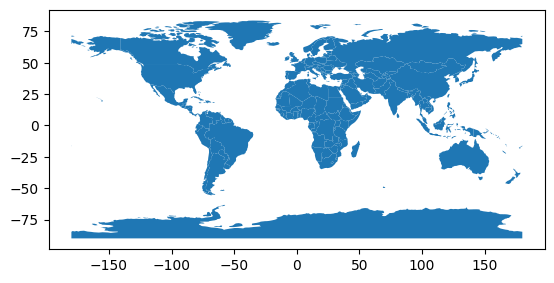

In [19]:
countries.plot()

In [20]:
places = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/geopython-workshop/workshop/jupyter/content/data/populated_places.gpkg')

places

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,...,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,...,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,4,1159146051,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,...,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,4,1159146061,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,...,ロバンバ,로밤바,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,4,1159146343,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,...,ルクセンブルク市,룩셈부르크,Luxemburg,Luksemburg,Luxemburg,Lüksemburg,Luxembourg,4,1159146437,POINT (6.13000 49.61166)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0,600,1,Admin-1 capital,Rio de Janeiro,None,None,0,Rio de Janeiro,0.0,...,リオデジャネイロ,리우데자네이루,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,4,1159151619,POINT (-43.22697 -22.92308)
239,0,600,1,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,0,Sao Paulo,0.0,...,サンパウロ,상파울루,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo,4,1159151621,POINT (-46.62697 -23.55673)
240,0,600,3,Admin-1 capital,Sydney,None,None,0,Sydney,0.0,...,シドニー,시드니,Sydney,Sydney,Sydney,Sidney,Sydney,4,1159151623,POINT (151.18323 -33.91807)
241,0,600,0,Admin-0 capital,Singapore,None,None,0,Singapore,1.0,...,シンガポール,싱가포르,Singapore,Singapur,Singapore,Singapur,Singapore,4,1159151627,POINT (103.85387 1.29498)


#### Loading a GeoJSON file

Loading local geojson file

In [21]:
rivers = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/geopython-workshop/workshop/jupyter/content/data/rivers.geojson')
rivers

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"MULTILINESTRING ((104.61476 12.38203, 104.6176..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"MULTILINESTRING ((37.73951 59.07954, 37.75733 ..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"MULTILINESTRING ((38.47804 59.21666, 38.48528 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,2049Lake Centerline,10.0,Lake Centerline,Ohau,None,2049,None,7.2,Ohau,8.2,...,None,None,None,None,None,None,None,4,1159129657,"MULTILINESTRING ((170.19260 -44.34343, 170.200..."
1451,219River,6.0,River,Po,None,219,Version 4 edit,5.0,Po,6.0,...,Pad,Rio Pó,По,Po,Po Nehri,Sông Po,波河,4,1159129663,"MULTILINESTRING ((7.64746 44.83906, 7.61408 44..."
1452,178River,5.0,River,Loire,None,178000,Changed in 2.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129671,MULTILINESTRING EMPTY
1453,178River,5.0,River,Loire,None,178,Changed in 4.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129677,"MULTILINESTRING ((3.07819 46.98509, 3.07171 46..."


#### Loading PostgreSQL table

Loading data from a database. (we only show the code, you may want to run
and populate a local PostGIS-enabled database).

```python
import psycopg2

con = psycopg2.connect(database="postgres", user="postgres", password="postgres",
    host="localhost")

sql = "SELECT * FROM public.places"
places = gpd.read_postgis(sql, con, geom_col='geom')
```

#### Importing a CSV file

Assuming that a CSV has a geometry column in OGC Well-Known Text (WKT) format:

In [22]:
from shapely import wkt

airport = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/geopython-workshop/workshop/jupyter/content/data/airport.csv')

airport['geometry'] = airport['geom'].apply(wkt.loads)
del airport['geom']
airport

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.000,...,,,,Ludhiana Airport,,,,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.000,...,,,,,,,,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.000,...,Port lotniczy Ranchi,,,M. O. Ranchi,,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.000,...,Port lotniczy Ahwaz,,,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74711 31.34316)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.000,...,Port lotniczy Gwalior,,,Gwalior Airport,,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,Airport,major,Madrid Barajas,MAD,terminal,LEMD,MAD,http://en.wikipedia.org/wiki/Madrid_Barajas_In...,150.000,...,Port lotniczy Madryt-Barajas,Aeroporto de Adolfo Suárez Madrid-Barajas,Барахас,Madrid-Barajas flygplats,Madrid Barajas Uluslararası Havalimanı,Sân bay quốc tế Madrid Barajas,马德里－巴拉哈斯机场,4,1159127851,POINT (-3.56903 40.46813)
887,2,Airport,major,Luis Muñoz Marin,SJU,terminal,TJSJ,SJU,http://en.wikipedia.org/wiki/Luis_Mu%C3%B1oz_M...,150.000,...,Port lotniczy Luis Muñoz Marín,Aeroporto Internacional Luis Muñoz Marin,Каролина,Luis Muñoz Marín International Airport,,Sân bay quốc tế Luis Muñoz Marín,路易斯·穆尼奥斯·马林国际机场,4,1159127861,POINT (-66.00423 18.43808)
888,2,Airport,major,Arlanda,ARN,terminal,ESSA,ARN,http://en.wikipedia.org/wiki/Stockholm-Arlanda...,150.000,...,Port lotniczy Sztokholm-Arlanda,Aeroporto de Arlanda,Стокгольм-Арланда,Stockholm Arlanda Airport,Stockholm-Arlanda Havalimanı,Sân bay Stockholm-Arlanda,斯德哥爾摩－阿蘭達機場,4,1159127877,POINT (17.93073 59.65112)
889,2,Airport,major,Soekarno-Hatta Int'l,CGK,parking,WIII,CGK,http://en.wikipedia.org/wiki/Soekarno-Hatta_In...,150.000,...,Port lotniczy Dżakarta-Soekarno-Hatta,Aeroporto Internacional Soekarno-Hatta,Сукарно-Хатта,Soekarno-Hatta International Airport,Soekarno-Hatta Uluslararası Havalimanı,Sân bay quốc tế Soekarno-Hatta,蘇加諾－哈達國際機場,4,1159127891,POINT (106.65430 -6.12660)


#### Creating a geometry on the fly

Create a `GeoDataFrame` from a CSV file having standard text columns like
'longitude' or 'lon' and 'latitude' or 'lat'.
These which will be used to create a geometry column in the GeoDataFrame on-the-fly.

In [23]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/geopython-workshop/workshop/jupyter/content/data/stadium.csv')
stadium = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))
stadium

,name,capacity,lat,lon,geometry
0,Eden Gardens,66349,22.564608,88.341071,POINT (88.34107 22.56461)
1,Wankhede Stadium,33108,18.938853,72.823570,POINT (72.82357 18.93885)
2,Narendra Modi Stadium,132000,18.984750,73.119733,POINT (73.11973 18.98475)
3,M. A. Chidambaram Stadium,54000,13.062866,80.278154,POINT (80.27815 13.06287)
4,Arun Jaitley Stadium,41820,28.637923,77.240979,POINT (77.24098 28.63792)


#### Creating a GeoDataFrame manually

You can also create a GeoDataFrame programmatically, for example here in the Notebook, using your own data:

In [24]:
from shapely.geometry import Point

parking_enforcement = gpd.GeoDataFrame({
    'id': [1, 2,3,4,5],
    'geometry': [Point(1, 1), Point(2, 2),Point(2, 1),Point(1, 2),Point(1.5, 2)],
    'parking_meters': [12,34,112,41, 212]})
parking_enforcement

,id,geometry,parking_meters
0,1,POINT (1.00000 1.00000),12
1,2,POINT (2.00000 2.00000),34
2,3,POINT (2.00000 1.00000),112
3,4,POINT (1.00000 2.00000),41
4,5,POINT (1.50000 2.00000),212


### Handling CRS in Geopandas

Unlike `Shapely`, `GeoPandas` understands CRS concepts, using [pyproj](https://pyproj4.github.io/pyproj/stable/) under the hood.

Why are CRSs important?

- a CRS definition provides a standardized mechanism to communicate projection information of a given dataset.  This ensures correct and accurate placement of geometries.
- CRS will make sense out of your data such as whether the units are degrees/meters
- Bringing all data in the same CRS allows us to do spatial analysis with data


Display the CRS of a GeoDataFrame

In [25]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can also set the CRS for a GeoDataFrame that has no default CRS

In [26]:
parking_enforcement = parking_enforcement.set_crs('epsg:4326')
parking_enforcement.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can convert a GeoDataFrame from one CRS to another. This is often call "reprojection".

In [27]:
parking_enforcement.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
parking_enforcement_3857 = parking_enforcement.to_crs(3857)

In [29]:
parking_enforcement_3857.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The remaining sections on GeoPandas are tagged "ADVANCED" and may not be treated in the workshop.
We leave them for you as exercise.

### Merging DataFrames - ADVANCED

#### Attribute based merge

In [30]:
neighbor = pd.DataFrame({
    'id': [1, 2,3,4,5],
    'neighbor_id': ['a1', 'a2','b3','c4','d5'],
    'neighbor_name': ['andy','julio','droid','steve', 'ramesh']})
neighbor

,id,neighbor_id,neighbor_name
0,1,a1,andy
1,2,a2,julio
2,3,b3,droid
3,4,c4,steve
4,5,d5,ramesh


In [31]:
updated_parking_enforcement = parking_enforcement.merge(neighbor, on='id')
updated_parking_enforcement

,id,geometry,parking_meters,neighbor_id,neighbor_name
0,1,POINT (1.00000 1.00000),12,a1,andy
1,2,POINT (2.00000 2.00000),34,a2,julio
2,3,POINT (2.00000 1.00000),112,b3,droid
3,4,POINT (1.00000 2.00000),41,c4,steve
4,5,POINT (1.50000 2.00000),212,d5,ramesh


#### Spatial merge

GeoPandas also provides functions for "Spatial Joins".
We won't go in many details here, but it is a very powerful
feature you may want to check out. Some examples below:


```python
pd.set_option('display.max_columns', 100)
airport = airport.set_crs('epsg:4326')
airport.head()

simple_countries = countries[['ADMIN','geometry']]
simple_countries.head()

airport_with_country = gpd.sjoin(airport, simple_countries, how="inner", op='intersects')
airport_with_country.head()

```

The `op` parameter is another way to perform same query can be using
 operation `within` instead of `intersect`:

```python
airport_with_country_within = gpd.sjoin(airport, simple_countries, how="inner", op='within')
airport_with_country.head()

```
Further parameters:

The `how` parameter. We can use `left` , `right` , `inner` .

* `left`: use the index from the first (or left_df) geodataframe that you provide to sjoin; retain only the left_df geometry column
* `right`: use the index from second (or right_df); retain only the right_df geometry column
* `inner`: use the intersection of index values from both geodataframes; retain only the left_df geometry column

```python
airport_with_country_right = gpd.sjoin(airport, simple_countries, how="right", op='within')
airport_with_country_right.head()
```

### Edit the existing data - ADVANCED

#### Editing metadata

In [32]:
updated_parking_enforcement.iloc[0]

id                          1
geometry          POINT (1 1)
parking_meters             12
neighbor_id                a1
neighbor_name            andy
Name: 0, dtype: object

In [33]:
updated_parking_enforcement.iloc[0,2] = 24

In [34]:
updated_parking_enforcement.iloc[0]

id                          1
geometry          POINT (1 1)
parking_meters             24
neighbor_id                a1
neighbor_name            andy
Name: 0, dtype: object

#### Editing geometry

In [35]:
from shapely.geometry import Point

updated_point = Point(3,4)
updated_parking_enforcement.iloc[0,0] = updated_point
updated_parking_enforcement

,id,geometry,parking_meters,neighbor_id,neighbor_name
0,POINT (3 4),POINT (1.00000 1.00000),24,a1,andy
1,2,POINT (2.00000 2.00000),34,a2,julio
2,3,POINT (2.00000 1.00000),112,b3,droid
3,4,POINT (1.00000 2.00000),41,c4,steve
4,5,POINT (1.50000 2.00000),212,d5,ramesh


### Querying data - ADVANCED

#### Based on metadata

In [36]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [37]:
India = countries[countries['ADMIN'] == "India"]
India

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
98,Admin-0 country,1,2,India,IND,0,2,Sovereign country,1,India,...,None,None,None,None,None,None,None,None,None,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."


In [38]:
densly_pop = countries[countries['POP_EST'] > 100000000]
densly_pop

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
8,Admin-0 country,1,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
18,Admin-0 country,1,2,Russia,RUS,0,2,Sovereign country,1,Russia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ..."
27,Admin-0 country,1,2,Mexico,MEX,0,2,Sovereign country,1,Mexico,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."
29,Admin-0 country,1,2,Brazil,BRA,0,2,Sovereign country,1,Brazil,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Admin-0 country,1,2,China,CH1,1,2,Country,1,China,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
147,Admin-0 country,1,2,Philippines,PHL,0,2,Sovereign country,1,Philippines,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ..."
155,Admin-0 country,1,2,Japan,JPN,0,2,Sovereign country,1,Japan,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."
163,Admin-0 country,1,2,Egypt,EGY,0,2,Sovereign country,1,Egypt,...,None,None,None,None,None,None,None,None,None,"POLYGON ((36.86623 22.00000, 32.90000 22.00000..."


In [39]:
countriesWithC = countries[countries['SOVEREIGNT'].str.startswith('C')]
countriesWithC

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
10,Admin-0 country,1,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
15,Admin-0 country,1,3,Chad,TCD,0,2,Sovereign country,1,Chad,...,None,None,None,None,None,None,None,None,None,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
32,Admin-0 country,1,2,Colombia,COL,0,2,Sovereign country,1,Colombia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
34,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Admin-0 country,1,3,Cambodia,KHM,0,2,Sovereign country,1,Cambodia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((102.58493 12.18659, 102.34810 13.394..."
126,Admin-0 country,1,6,Croatia,HRV,0,2,Sovereign country,1,Croatia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((16.56481 46.50375, 16.88252 46.38063..."
139,Admin-0 country,1,2,China,CH1,1,2,Country,1,China,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
153,Admin-0 country,1,5,Czechia,CZE,0,2,Sovereign country,1,Czechia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((15.01700 51.10667, 15.49097 50.78473..."


In [40]:
densecountriesWithC = countries[(countries['SOVEREIGNT'].str.startswith('C')) &  (countries['POP_EST'] > 1000000000)]
densecountriesWithC

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
139,Admin-0 country,1,2,China,CH1,1,2,Country,1,China,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."


#### Spatial query

Spatial query uses shapely geometry as base geometry on top of which geodataframe can be queried.
Available oprations are listed at
https://shapely.readthedocs.io/en/latest/manual.html#binary-predicates

In [41]:
indian_shape = India['geometry'].squeeze()

In [42]:
type(India['geometry'].squeeze())

shapely.geometry.polygon.Polygon

In [43]:
test_pt = Point(1,1)

In [44]:
test_pt.intersects(indian_shape)

False

In [45]:
nashik = Point(73.76,19.93)

In [46]:
nashik.within(indian_shape)

True

In [47]:
indian_airport = airport[airport.within(indian_shape)]
indian_airport

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.000,...,,,,Ludhiana Airport,,,,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.000,...,,,,,,,,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.000,...,Port lotniczy Ranchi,,,M. O. Ranchi,,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.000,...,Port lotniczy Gwalior,,,Gwalior Airport,,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549)
6,9,Airport,mid,Devi Ahilyabai Holkar Int'l,IDR,terminal,VAID,IDR,http://en.wikipedia.org/wiki/Devi_Ahilyabai_Ho...,8.000,...,Port lotniczy Indore,,Ахилия Бай,Devi Ahilyabai Holkar International Airport,,Sân bay quốc tế Devi Ahilyabai Holkar,印多爾,4,1159113903,POINT (75.80929 22.72775)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,4,Airport,major,Chennai Int'l,MAA,terminal,VOMM,MAA,http://en.wikipedia.org/wiki/Chennai_Internati...,50.000,...,Port lotniczy Ćennaj,Aeroporto Internacional de Chennai,Ченнаи,Chennai internationella flygplats,,Sân bay quốc tế Chennai,金奈国际机场,4,1159125429,POINT (80.16378 12.98253)
725,4,Airport,major and military,Pune,PNQ,terminal,VAPO,PNQ,http://en.wikipedia.org/wiki/Pune_Airport,50.000,...,Port lotniczy Pune,,Пуна,Pune Airport,,Sân bay quốc tế Pune,浦那国际机场,4,1159125819,POINT (73.90898 18.57918)
738,4,Airport,major,Surat,STV,terminal,VASU,STV,http://en.wikipedia.org/wiki/Surat_Airport,50.000,...,,,,Surat Airport,,Sân bay Surat,蘇拉特機場,4,1159125995,POINT (72.74244 21.12045)
838,2,Airport,major,Chhatrapati Shivaji Int'l,BOM,terminal,VABB,BOM,http://en.wikipedia.org/wiki/Chhatrapati_Shiva...,150.000,...,Port lotniczy Chhatrapati Shivaji,Aeroporto Internacional de Chhatrapati Shivaji,Международный аэропорт имени Чатрапати Шиваджи,Chhatrapati Shivaji internationella flygplats,,Sân bay quốc tế Chhatrapati Shivaji,贾特拉帕蒂·希瓦吉国际机场,4,1159127317,POINT (72.87456 19.09510)


#### Quiz: Can you create the dataframe of all airports and cities within your country

<Axes: >

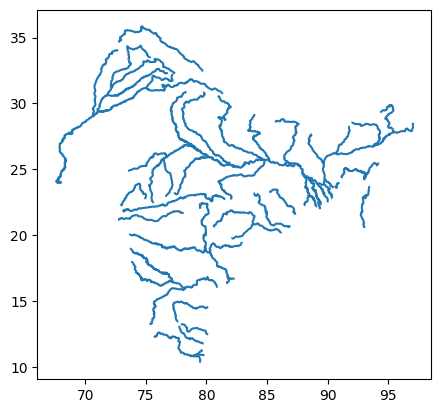

In [48]:
indian_rivers = rivers[rivers.intersects(indian_shape)]
indian_rivers.plot()

<Axes: >

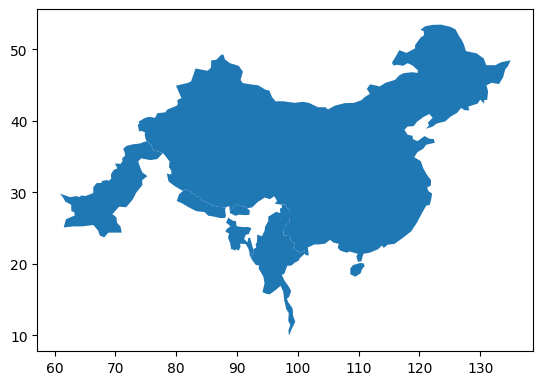

In [49]:
Neighbours_India = countries[countries.touches(indian_shape)]
Neighbours_India.plot()

### Geospatial Operations - ADVANCED

Understanding base logic first! Back to Shapely.

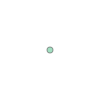

In [50]:
test_point = Point(0,0)
test_point

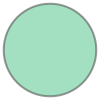

In [51]:
test_point.buffer(10)

In [52]:
test_point.buffer(10).area

313.6548490545941

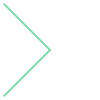

In [53]:
from shapely.geometry import LineString

test_line = LineString([(0, 0), (1, 1), (0, 2)])
test_line

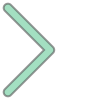

In [54]:
#Buffer puts original geometry at center and create buffer alongside
test_line.buffer(0.1)

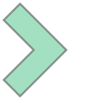

In [55]:
#We can also put geometry on either side ( Positive value will put buffer to left)

test_line.buffer(0.5, single_sided=True)

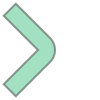

In [56]:
#We can also put geometry on either side ( negative value will put buffer to right)

test_line.buffer(-0.5, single_sided=True)

#### Operations in `geopandas`

In [57]:
Indian_cities =  places[places.within(indian_shape)]
Indian_cities

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
202,1,300,1,Admin-0 capital,New Delhi,None,None,0,New Delhi,1.0,...,ニューデリー,뉴델리,New Delhi,Nowe Delhi,New Delhi,Yeni Delhi,New Delhi,4,1159151541,POINT (77.19998 28.60002)
203,1,300,1,Admin-1 capital,Bangalore,None,Bengaluru,0,Bangalore,0.0,...,バンガロール,벵갈루루,Bangalore,Bengaluru,Bangalore,Bangalore,Bengaluru,4,1159151543,POINT (77.55806 12.97194)
237,0,600,1,Admin-1 capital,Kolkata,Calcutta,None,0,Kolkata,0.0,...,コルカタ,콜카타,Calcutta,Kolkata,Calcutta,Kalküta,Kolkata,4,1159151617,POINT (88.32273 22.49692)


In [58]:
Indian_cities_m = Indian_cities.to_crs(3857)
Indian_cities_m.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
city_buffer = Indian_cities_m[['geometry','NAME']]
city_buffer

,geometry,NAME
202,POINT (8593862.465 3324835.758),New Delhi
203,POINT (8633724.176 1456526.778),Bangalore
237,POINT (9832041.307 2571291.354),Kolkata


<Axes: >

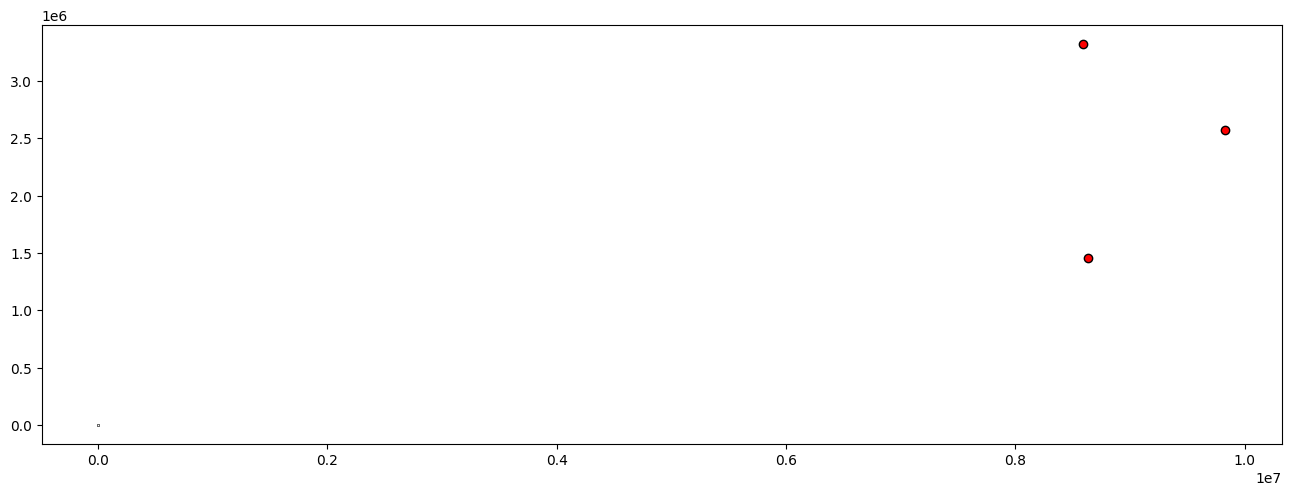

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 16))
India.plot(ax=ax, color='#ffffff', edgecolor='#6a6a6a', linewidth=2)
city_buffer.plot(ax=ax, color='#f00', edgecolor='#000000')

In [61]:
pd.options.mode.chained_assignment = None  # default='warn'
city_buffer['geom'] = city_buffer.buffer(50000)
city_buffer

,geometry,NAME,geom
202,POINT (8593862.465 3324835.758),New Delhi,"POLYGON ((8643862.465 3324835.758, 8643621.701..."
203,POINT (8633724.176 1456526.778),Bangalore,"POLYGON ((8683724.176 1456526.778, 8683483.413..."
237,POINT (9832041.307 2571291.354),Kolkata,"POLYGON ((9882041.307 2571291.354, 9881800.543..."


In [62]:
countries_centroid = countries[['geometry','NAME','CONTINENT']]
countries_centroid = countries_centroid.to_crs(3857) # all operations should be carried out in meters, thus we convert it in 3857
countries_centroid.head()

,geometry,NAME,CONTINENT
0,"MULTIPOLYGON (((20037508.343 -1812498.413, 200...",Fiji,Oceania
1,"POLYGON ((3774143.866 -105758.362, 3792946.708...",Tanzania,Africa
2,"POLYGON ((-964649.018 3205725.605, -964597.245...",W. Sahara,Africa
3,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",Canada,North America
4,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",United States of America,North America


In [63]:
countries_centroid['geometry'] = countries_centroid['geometry'].centroid
countries_centroid = countries_centroid.to_crs(4326) # once operations are done in above step, we can shift it back to original CRS
countries_centroid.head()

,geometry,NAME,CONTINENT
0,POINT (163.93160 -17.31993),Fiji,Oceania
1,POINT (34.75848 -6.27836),Tanzania,Africa
2,POINT (-12.11291 24.33402),W. Sahara,Africa
3,POINT (-96.99822 67.99064),Canada,North America
4,POINT (-119.45018 51.26001),United States of America,North America


In [64]:
countries = countries.to_crs(3857) # all operations should be carried out in meters, thus we convert it in 3857
countries['area'] = countries['geometry'].area
countries = countries.to_crs(4326)  # once operations are done in above step, we can shift it back to original CRS
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,area
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2.128334e+10
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",9.522552e+11
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",1.171023e+11
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",5.216648e+13
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2.186228e+13


### Visualising a GeoDataFrame - ADVANCED

<Axes: >

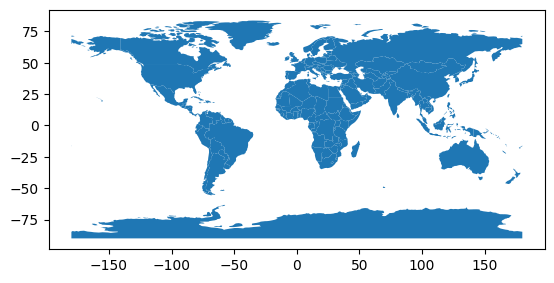

In [65]:
#simple visualisation
countries.plot()

<Axes: >

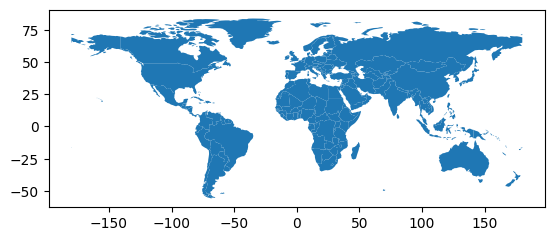

In [66]:
countries_m = countries[countries['NAME'] != "Antarctica"]
countries_m.plot()

<Axes: >

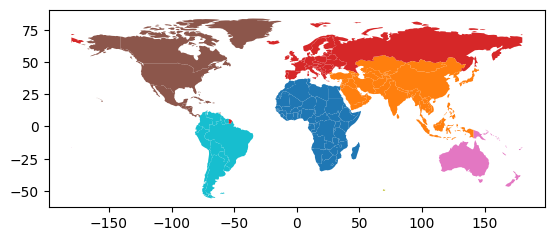

In [67]:
#color based on column
countries_m.plot(column='CONTINENT')

<Axes: >

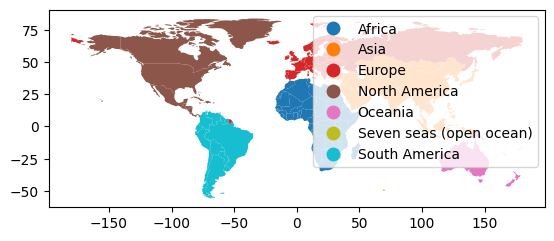

In [68]:
countries_m.plot(column='CONTINENT',legend=True)

<Axes: >

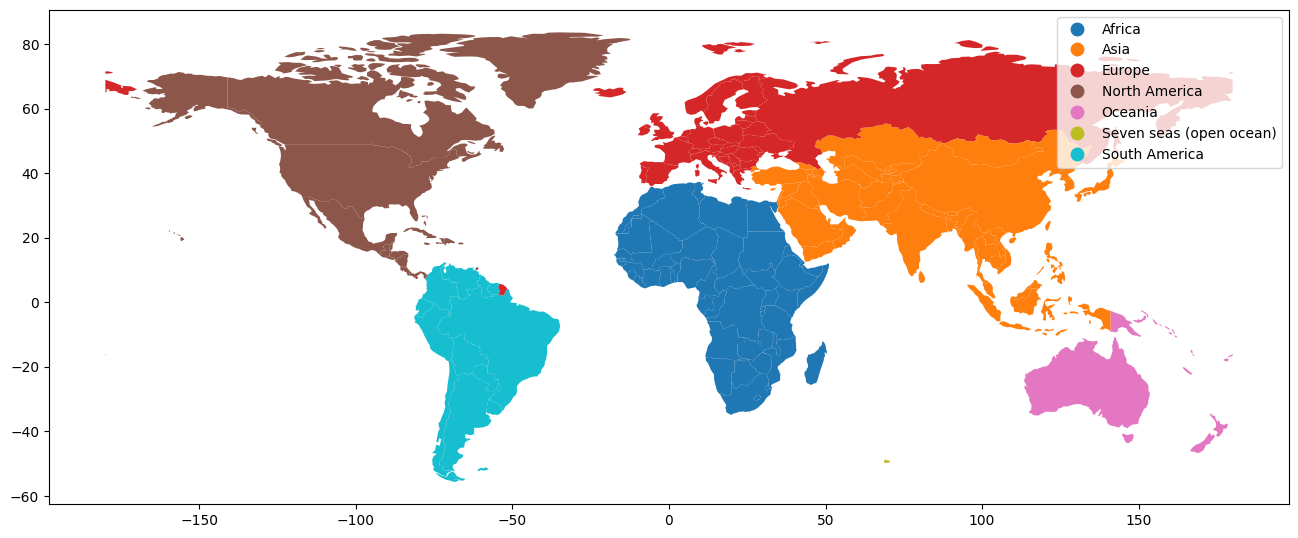

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))
countries_m.plot(ax=ax,column='CONTINENT',legend=True)

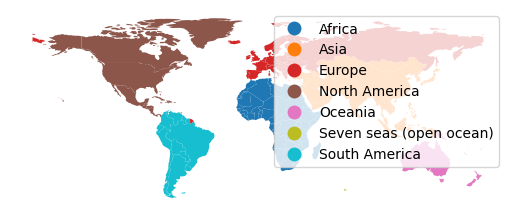

In [70]:
ax = countries_m.plot(column='CONTINENT',legend=True)
ax.set_axis_off()

<Axes: >

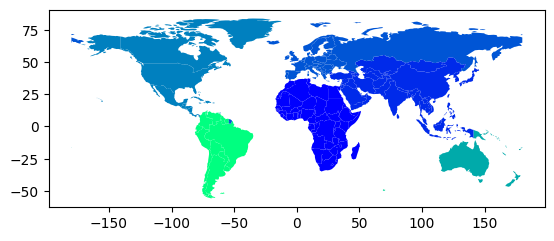

In [71]:
#Checkout available color maps => https://matplotlib.org/2.0.2/users/colormaps.html
countries_m.plot(column='CONTINENT',  cmap='winter')


<Axes: >

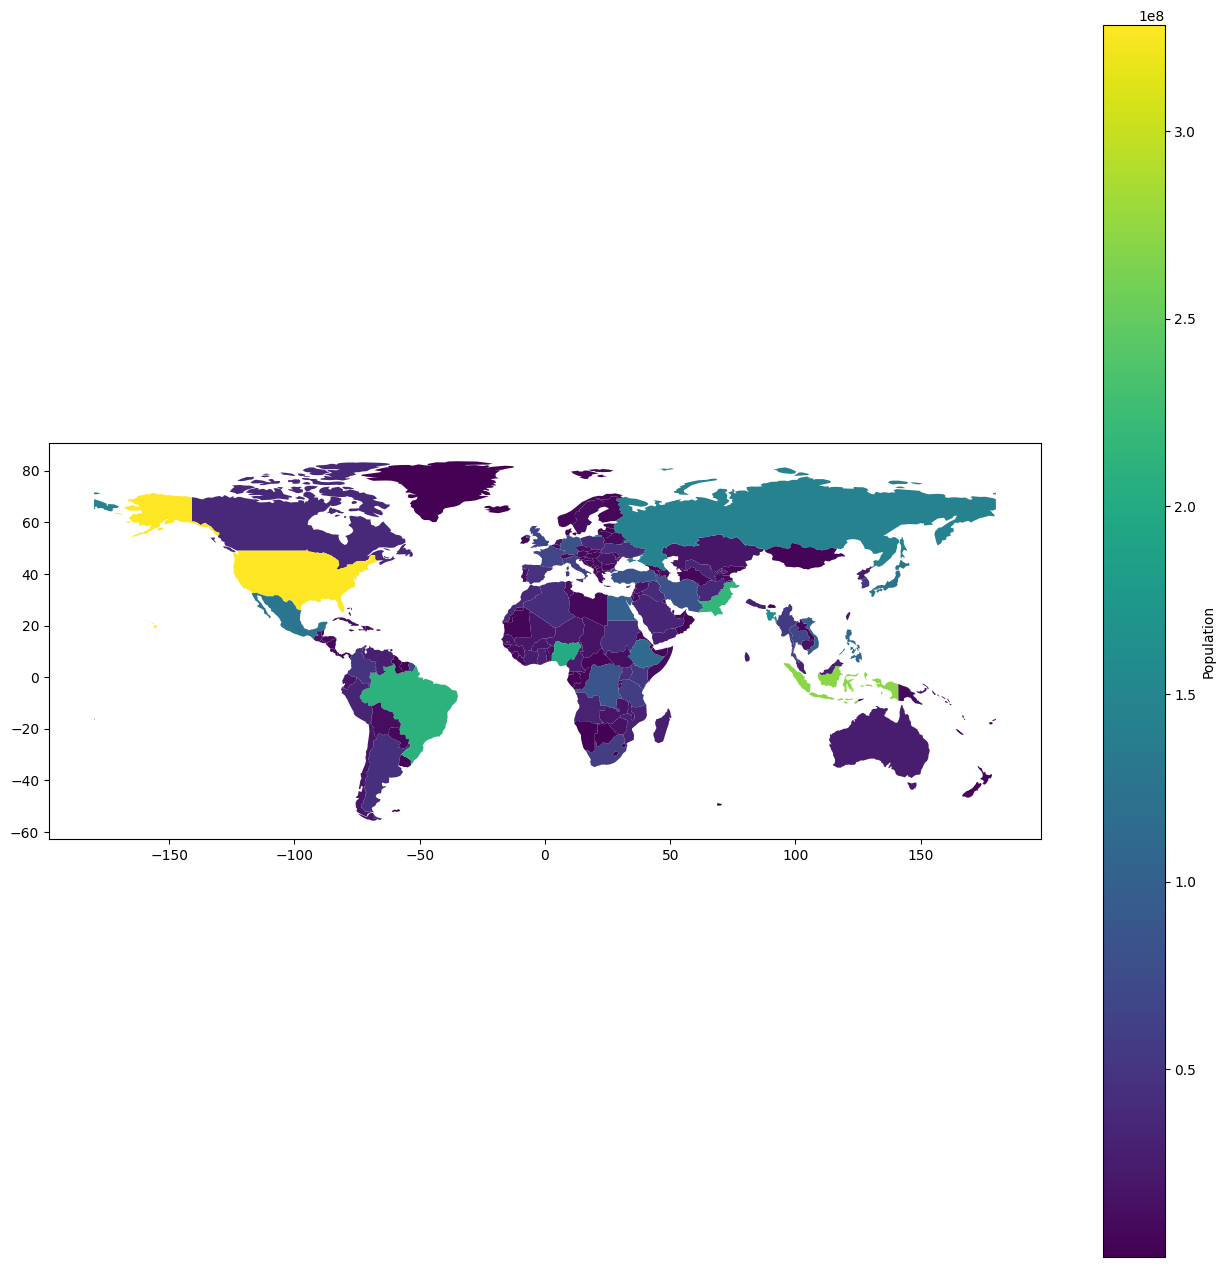

In [72]:
countries_plot = countries_m[(countries_m['NAME'] != 'India') & (countries_m['NAME'] != 'China')]
countries_plot.plot(column='POP_EST',legend=True,figsize=(16,16), legend_kwds={'label': 'Population'})

#### matplotlib to show multiple data

<Axes: >

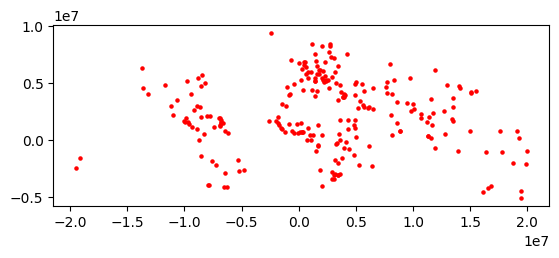

In [73]:
basemap = countries_m.plot(column='CONTINENT', cmap='cool')
cities_m = places.to_crs(3857)
cities_m.plot(ax=basemap, marker='o', color='red', markersize=5)

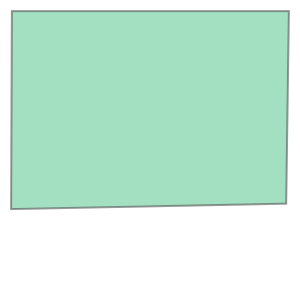

In [75]:
#load world polygon
bbox = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/geopython-workshop/workshop/jupyter/content/data/world.geojson')
world = bbox.loc[0].geometry
world

In [76]:
cities_m = cities_m[cities_m.within(world)]

<Axes: >

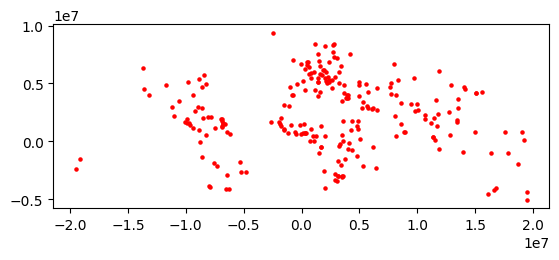

In [77]:
basemap = countries_m.plot(column='CONTINENT', cmap='cool')
cities_m.plot(ax=basemap, marker='o', color='red', markersize=5)

#### geopandas overlay to show multiple data

<Axes: >

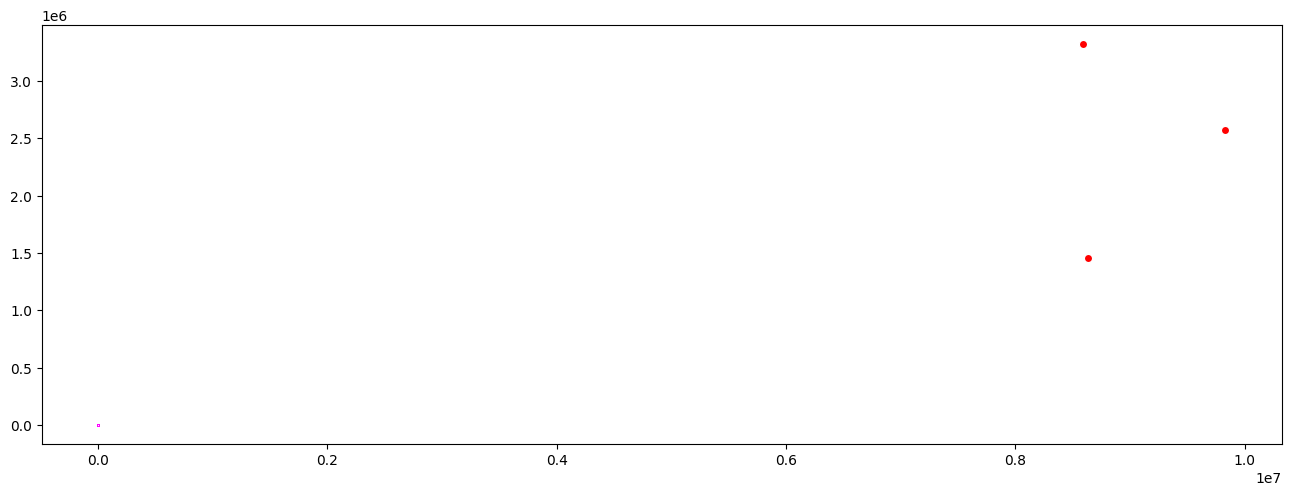

In [78]:
fig, ax = plt.subplots(figsize=(16, 16))

India.plot(ax=ax, color='b', edgecolor='#f0f', linewidth=2)
Indian_cities_m.plot(ax=ax, color='r', edgecolor='#fff')


In [79]:
Indian_cities_m['geometry'] = Indian_cities_m['geometry'].buffer(50000)

<Axes: >

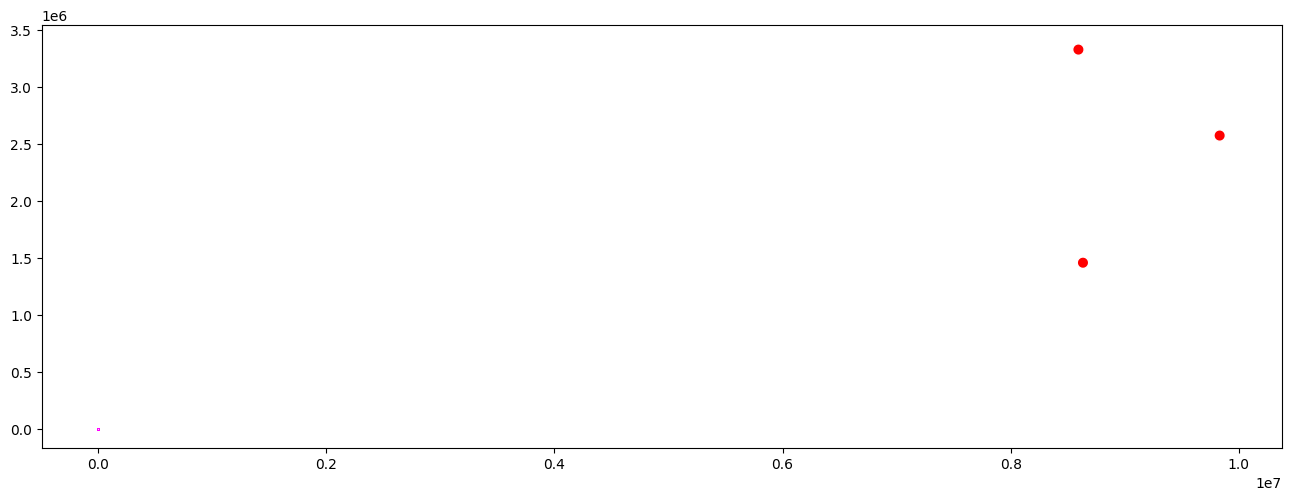

In [80]:
fig, ax = plt.subplots(figsize=(16, 16))

India.plot(ax=ax, color='b', edgecolor='#f0f', linewidth=2)
Indian_cities_m.plot(ax=ax, color='r', edgecolor='#fff')

You may also do an `overlay` function:

```
non_rural_area = gpd.overlay(India, Indian_cities_m, how='difference')
non_rural_area.plot(figsize=(16, 16))
```

---
[<- Spatial Reference Systems](03-spatial-reference-systems.ipynb) | [Raster data ->](05-raster-data.ipynb)
